In [54]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [55]:
# wind data from Scatterometer Climatology of Ocean Winds (SCOW)
scow = xr.open_dataset('http://wilson.coas.oregonstate.edu:8080/thredds/dodsC/CIOSS/SCOW/Monthly/scow_monthly_maps.nc')

# an annual mean to data
scow_am = scow.mean(dim='time').load()
ds = scow_am.transpose('latitude', 'longitude')

In [56]:
def quick_quiver(u, v, sampling_x=10, sampling_y=10,
                 scalar=None, mag_max=None, **kwargs):
    x = u.longitude
    y = u.latitude
    slx = slice(None, None, sampling_x)
    sly = slice(None, None, sampling_y)
    sl2d = (sly, slx)
    if scalar is None:
        mag = 0.5*(u**2 + v**2)**0.5
    else:
        mag = scalar

    fig, ax = plt.subplots(**kwargs)
    mag.plot(ax=ax, vmax=mag_max)
    return ax, ax.quiver(x[slx], y[sly], u[sl2d], v[sl2d])

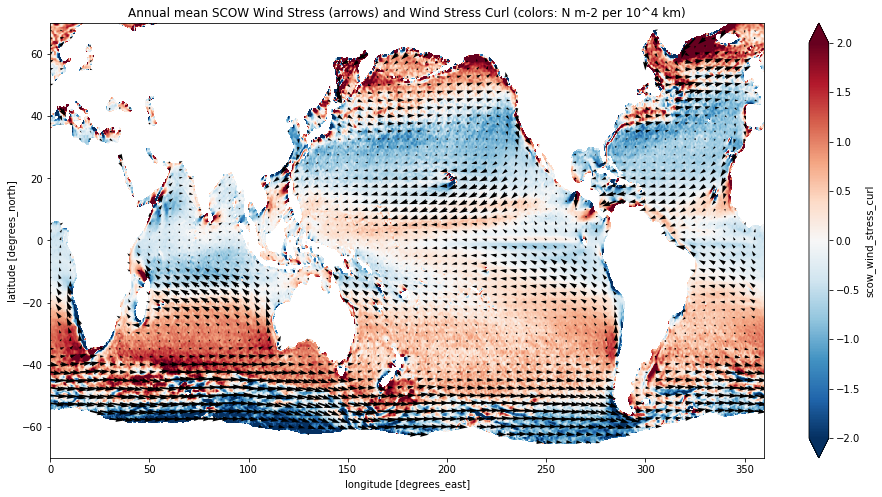

In [58]:
quick_quiver(ds.scow_zonal_wind_stress, ds.scow_meridional_wind_stress,
             scalar=ds.scow_wind_stress_curl,
             mag_max=2, sampling_x=20,
             figsize=(16,8))
plt.title('Annual mean SCOW Wind Stress (arrows) and Wind Stress Curl (colors: %s)' 
           % scow.scow_wind_stress_curl.attrs['units']);

### Annual mean wind data from Scatterometer Climatology of Ocean Winds (SCOW).

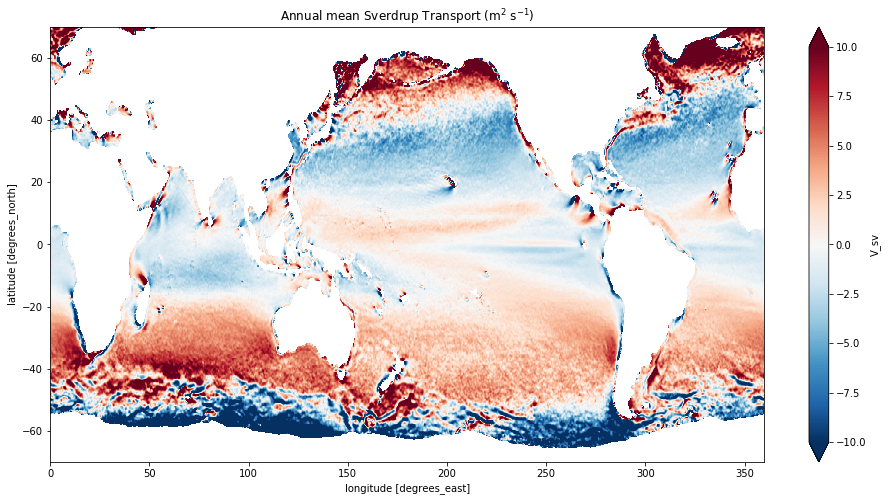

In [60]:
omega = 7.29e-5                                              # Earth's rotation, [rad/s]
R = 6.3781e6                                                 # Earth's radius, [m]
f = 2 * omega * np.sin(np.deg2rad(ds.latitude))              # Coriolis param, [/s]
beta = 2 * omega / R * np.cos(np.deg2rad(ds.latitude))       # Beta, [/ms]
rho0 = 1030                                                  # Water density, [kg/m3]
ds['V_sv'] = ds.scow_wind_stress_curl / (beta * rho0 * 1e7)  # Sverdrup transport, [m2/s]

fig, ax = plt.subplots(figsize=(16,8))
ds.V_sv.plot(vmax=10, ax=ax)
plt.title('Annual mean Sverdrup Transport (m$^2$ s$^{-1}$)');

### Sverdrup transport corresponding to annual mean wind curl.